# How to integrate Financial Data from Refinitiv Data Platform to Excel with Xlwings - Part 2 

## Overview

This notebook is the second part of the series that demonstrate how to export financial data and report from Python/Jupyter application to Excel report file using xlwings CE and xlwings Pro libraries. The demo applications use content from [Refinitiv Data Platform (RDP)](https://developers.refinitiv.com/refinitiv-data-platform/refinitiv-data-platform-apis) as an example dataset.

This second notebook is focusing on xlwings Reports, Embedded Code, and PDF features. 

*Note*: All figures and reports demonstrate Time-Series 90 days data queried on 24th November 2020.

## Introduction to xlwings

[xlwings](https://www.xlwings.org) is a Python library that makes it easy to call Python from Excel and vice versa on Windows and macOS. The library lets you automate Excel from Python source code to produce reports or to interact with Jupyter notebook applications. It also allows you to replace VBA macros with Python Code or write UDFs (user defined functions - Windows only).
* The [xlwings CE](https://docs.xlwings.org/en/stable) is a free and open-source library ([BSD-licensed](https://opensource.org/licenses/BSD-3-Clause)) which provides basic functionalities to lets developers integrate Python with Excel. 
* The [xlwings PRO](https://www.xlwings.org/pro) provides more advanced features such as [reports](https://www.xlwings.org/reporting), embedded Python code in Excel, one-click installers for easy deployment, video training, dedicated support, and much more. 

If you are not familiar with xlwings library or xlwings CE, please see more detail in the [first notebook](./rdp_xlwingsce_notebook.ipynb) and [How to integrate Financial Data from Refinitiv Data Platform to Excel with Xlwings - Part 1](https://developers.refinitiv.com/en/article-catalog/article/how-to-integrate-financial-data-from-refinitiv-data-platform-to-) article.


This notebook application is based on xlwings version **0.21.3**.

## Introduction to Refinitiv Data Platform (RDP) Libraries

Refinitiv provides a wide range of contents and data which require multiple technologies, delivery mechanisms, data formats, and the multiple APIs to access each content. The [RDP Libraries](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-platform-libraries) are a suite of ease-of-use interfaces providing unified access to streaming and non-streaming data services offered within the [Refinitiv Data Platform (RDP)](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-platform-apis). The Libraries simplified how to access data to various delivery modes such as Request Response, Streaming, Bulk File, and Queues via a single library. 


For more deep detail regarding the RDP Libraries, please refer to the following articles and tutorials:
- [Developer Article: Discover our Refinitiv Data Platform Library part 1](https://developers.refinitiv.com/article/discover-our-upcoming-refinitiv-data-platform-library-part-1).
- [Developer Article: Discover our Refinitiv Data Platform Library part 2](https://developers.refinitiv.com/article/discover-our-upcoming-refinitiv-data-platform-library-part-2-0).
- [Refinitiv Data Platform Libraries Document: An Introduction page](https://developers.refinitiv.com/refinitiv-data-platform/refinitiv-data-platform-libraries/docs?content=62446&type=documentation_item).

### Disclaimer

As this notebook is based on alpha versions **1.0.0.a5** and **1.0.0.a7** of the Python library, the method signatures, data formats, etc. are subject to change.

## xlwings Reports

The [xlwings Reports](https://www.xlwings.org/reporting) is part of [xlwings PRO ](https://www.xlwings.org/pro) and a solution for template-based Excel and PDF reporting. The xlwings Reports let business users design and maintain their reports directly within Excel without being dependent on a dedicated reporting team or Python programmer.

The main features of the xlwings Reports are the following:
- **Separation of code and design**: Users without coding skills can change the template on their own without having to touch the Python code.
- **Template variables**: Python variables (between curly braces) can be directly used in cells, e.g. ```{{ title }}```. They act as placeholders that will be replaced by the actual values.
- **Frames for dynamic tables**: Frames are vertical containers that dynamically align and style tables that have a variable number of rows.

You can get a free trial for xlwings PRO [here](https://www.xlwings.org/pro), then follow the instructions on [How to activate xlwings PRO](https://docs.xlwings.org/en/stable/installation.html#how-to-activate-xlwings-pro) page.

## Intel vs AMD Report Template Preparation

We will use Intel and AMD stock price comparison as example data for this xlwings Reports file. 

Firstly, we create the Excel template as *part2_rdp_report_template.xlsx* file. The report template contains two sheets, one for daily pricing comparison and one for volume comparison.  

The daily pricing sheet template example is following:

![Figure-1](images/xlwingspro/xlwings_pro_template_1.png "Excel report template - Pricing sheet") 

### Templates Variables

You will noticed the double curly bracket placeholders like ```{{ intel_price_title}}```, ```{{ intel_price_df}}```, ```{{ amd_graph }}```, etc in the Excel template file. They are called *templates variable*. xlwings Reports will replace those template variables with data (Pandas DataFrame, text, Matplotlib/Plotly Charts, etc) from the Python code automatically.

### Frames

The other placeholder that you will be noticed is ```<frame>```. The xlwings Reports use Frames to align dynamic tables vertically: xlwings Reports will automatically insert rows for as long as your table is and apply the same styling as defined in your template - you save hours of manual reformatting. Please see the example below:

![Figure-2](images/xlwingspro/dynamic_tables.jpeg "xlwings PRO Report Frames") 
Image from [xlwings Reporting page](https://www.xlwings.org/reporting).

### Excel Table

Let take a closer look in the Daily Price Sheet, the ```{{ intel_price_df}}``` and ``` {{ amd_price_df}}``` template variables are in the Excel Table.

![Figure-3](images/xlwingspro/xlwings_pro_template_3.png "Excel Table") 

Using Excel tables is the recommended way to format tables as the styling (themes and alternating colors) can be applied dynamically across columns and rows. You can create Excel Table by go to ```Insert``` > ```Table``` menus and make sure that you activate ```My table has headers``` before clicking on OK. Then add the placeholder as usual on the top-left in your template.

*Note*:
* For Excel table support, you need at least [xlwings version 0.21.0](https://pypi.org/project/xlwings/0.21.0/).
* This feature supports Pandas DataFrame objects only (As of November 2020)
* When using Excel tables, DataFrame indices are excluded by default (xlwings version **0.21.0** to **0.21.2**).
* Since [xlwings version 0.21.3](https://docs.xlwings.org/en/stable/whatsnew.html#v0-21-3-nov-22-2020), the index is now transferred to Excel by default. If you would like to exclude the DataFrame index, you would need to use ```df.set_index('column_name')``` instead of ```df.reset_index()``` to hide the index.


### Multiple Sheets

The xlwings Reports also support multiple Excel Sheets. Business users just create new Sheets in a single Excel template file and place template variables, frame tags in those Sheets based on the business requirements. xlwings PRO automatically  replaces associate data in all Sheets. Developers do not need to manually create and manipulate new Excel Sheet(s) anymore. 

Let's demonstrate with Intel vs AMD Volume comparison Sheet template.

![Figure-4](images/xlwingspro/xlwings_pro_template_2.png "Excel report template - Volume sheet") 

Now the template file is ready, we can continue on the data preparation side of the Python Code.

### Shape Text

With newly released [xlwings version 0.21.4](https://docs.xlwings.org/en/stable/whatsnew.html#v0-21-4-nov-23-2020), xlwings Report supports template text in Shapes objects like Boxes or Rectangles with the templates variable. Please see more detail on [the Shape Text feature page](https://docs.xlwings.org/en/stable/reports.html#shape-text).

## Intel vs AMD Data Preparation

### Intel vs AMD 90 Days daily pricing data with RDP Content Layers

The RDP Content layer refers to logical market data objects, largely representing financial items like level 1 market data prices and quotes,  Order Books, News, Historical Pricing, Company Research data, and so on. 

When comparing to the RDP Function Layer, the Content Layer provides much more flexible manners for developers:
- Richer / fuller response e.g. metadata, sentiment scores - where available
- Using Asynchronous or Event-Driven operating modes - in addition to Synchronous
- Streaming Level 1 Market Price Data - as well as Snapshot requests

The Content layer can easily be used by both professional developers and financial coders. It provides great flexibility for familiar and commonly used financial data models. 

Please find more detail regarding the Content Layer on [RDP Libraries document page](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-platform-libraries/documentation).

In [1]:
# import xlwings and RDP libraries
import xlwings as xw
from xlwings.pro.reports import create_report
import refinitiv.dataplatform as rdp

In [2]:
# import all required libraries for this notebook
import datetime
import configparser as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as tick
import json
import datetime
import asyncio

You should save a text file with **filename** `rdp.cfg` having the following contents:

    [rdp]
    username = YOUR_RDP_EMAIL_USERNAME
    password = YOUR_RDP_PASSWORD
    app_key = YOUR_RDP_APP_KEY
    
This file should be readily available (e.g. in the current working directory) for the next steps.

In [3]:
cfg = cp.ConfigParser()
cfg.read('rdp.cfg')

['rdp.cfg']

The RDP Libraries let application consumes data from the following platforms
- DesktopSession (Eikon/Refinitiv Workspace)
- PlatformSession (RDP, Refinitiv Real-Time Optimized)
- DeployedPlatformSession (deployed Refinitiv Real-Time/ADS)

This Jupyter Notebook is focusing on the *PlatformSession* only. However, the main logic for other session types is the same when interacts with the xlwings library.

In [4]:
# Open RDP Platform Session
session = rdp.open_platform_session(
    cfg['rdp']['app_key'], 
    rdp.GrantPassword(
        username = cfg['rdp']['username'], 
        password = cfg['rdp']['password']
    )
)
session.get_open_state()

<State.Open: 3>

Firstly, we define all the necessary variables for requesting data.

In [5]:
# Define RICs
intel_ric = 'INTC.O'
amd_ric = 'AMD.O'

fields = ['BID','ASK','OPEN_PRC','HIGH_1','LOW_1','TRDPRC_1','BLKVOLUM']
count = 90



This notebook example utilizes Python [asyncio library](https://docs.python.org/3.7/library/asyncio.html) to retrieve data RDP Content Layer's ```HistoricalPricing``` interface ```get_summaries_async()```  function asynchronously.

In [6]:
help(rdp.HistoricalPricing.get_summaries_async)

Help on function get_summaries_async in module refinitiv.dataplatform.content.data.historical_pricing:

get_summaries_async(universe, session=None, interval=None, start=None, end=None, adjustments=None, sessions=None, count=None, fields=None, on_response=None, closure=None)
    ################################################################
    #  methods to request historical data summaries asynchronously #
    ################################################################



In [7]:
# Run two requests processes concurrently.
tasks = asyncio.gather(
    rdp.HistoricalPricing.get_summaries_async(intel_ric, interval = rdp.Intervals.DAILY, fields = fields, count = count),
    rdp.HistoricalPricing.get_summaries_async(amd_ric, interval = rdp.Intervals.DAILY, fields = fields, count = count)    
)

asyncio.get_event_loop().run_until_complete(tasks)

# Assign requests results to intel_interday and amd_interday variables
intel_interday, amd_interday = tasks._result


Once the task (requests Daily data of Intel and AMD) is completed, get the response data in [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) object format via ```<response>.data.df``` statement.

In [8]:
print("\nHistorical Pricing Summaries - Interday - Intel")
intel_df_pricing = intel_interday.data.df
display(intel_df_pricing)

print("\nHistorical Pricing Summaries - Interday - AMD")
amd_df_pricing = amd_interday.data.df
display(amd_df_pricing)


Historical Pricing Summaries - Interday - Intel


,BID,ASK,OPEN_PRC,HIGH_1,LOW_1,TRDPRC_1,BLKVOLUM
2020-07-21,60.7,60.72,61.515,61.9275,60.44,60.7,4746290
2020-07-22,61.03,61.04,61.31,61.765,60.62,61.05,3947594
2020-07-23,60.48,60.51,61.255,61.74,59.98,60.4,6101642
2020-07-24,50.58,50.59,52.15,52.18,49.5,50.59,16019857
2020-07-27,49.56,49.57,51.03,51.14,49.465,49.57,39240052
...,...,...,...,...,...,...,...
2020-11-18,45.04,45.05,45.55,45.685,45.04,45.06,8143106
2020-11-19,45.61,45.62,44.92,45.67,44.7,45.62,10611301
2020-11-20,45.39,45.4,45.66,45.88,45.33,45.39,7179993
2020-11-23,46.04,46.05,45.48,46.21,45.45,46.06,13927556



Historical Pricing Summaries - Interday - AMD


,BID,ASK,OPEN_PRC,HIGH_1,LOW_1,TRDPRC_1,BLKVOLUM
2020-07-21,56.99,57,57.805,58.5,56.3173,57,2291926
2020-07-22,61.78,61.79,57.07,62,56.97,61.79,6837200
2020-07-23,59.59,59.6,61.63,62.33,58.6342,59.57,6591082
2020-07-24,69.42,69.43,64.18,69.94,64.05,69.4,11847972
2020-07-27,68.96,68.98,69.28,71.63,67.79,68.97,7895400
...,...,...,...,...,...,...,...
2020-11-18,82.52,82.53,83.0135,83.955,82.22,82.54,2698798
2020-11-19,85.57,85.6,82.39,85.64,81.72,85.54,2784912
2020-11-20,84.63,84.64,85.28,86.1,84.47,84.64,3454704
2020-11-23,85.3,85.31,85.52,87.54,84.615,85.31,2246461


Now we have the raw Intel and AMD Daily Price data. The next phase is restructuring data to make it easier to read and to plot the report graphs.

### Restructure DataFrame 

Please note that the restructure steps are identical to the [part 1 notebook](./rdp_xlwingsce_notebook.ipynb) application. We start by naming the index column to "Date"

In [9]:
intel_df_pricing.index.name = 'Date'
amd_df_pricing.index.name = 'Date'

intel_df_pricing.head(5)

,BID,ASK,OPEN_PRC,HIGH_1,LOW_1,TRDPRC_1,BLKVOLUM
Date,,,,,,,
2020-07-21,60.7,60.72,61.515,61.9275,60.44,60.7,4746290
2020-07-22,61.03,61.04,61.31,61.765,60.62,61.05,3947594
2020-07-23,60.48,60.51,61.255,61.74,59.98,60.4,6101642
2020-07-24,50.58,50.59,52.15,52.18,49.5,50.59,16019857
2020-07-27,49.56,49.57,51.03,51.14,49.465,49.57,39240052


Next, we change all non-Date columns data type from String to Float.

In [10]:
for column in intel_df_pricing:
    intel_df_pricing[column]=intel_df_pricing[column].astype(float)

In [11]:
for column in amd_df_pricing:
    amd_df_pricing[column]=amd_df_pricing[column].astype(float)

 We change the DataFrame Date index to be a data column. This will let us plot a graph using **Date** as X-Axis.

In [12]:
intel_df_pricing.reset_index(level=0, inplace=True)
amd_df_pricing.reset_index(level=0, inplace=True)

intel_df_pricing.head(5)

,Date,BID,ASK,OPEN_PRC,HIGH_1,LOW_1,TRDPRC_1,BLKVOLUM
0,2020-07-21,60.70,60.72,61.515,61.9275,60.440,60.70,4746290.0
1,2020-07-22,61.03,61.04,61.310,61.7650,60.620,61.05,3947594.0
2,2020-07-23,60.48,60.51,61.255,61.7400,59.980,60.40,6101642.0
3,2020-07-24,50.58,50.59,52.150,52.1800,49.500,50.59,16019857.0
4,2020-07-27,49.56,49.57,51.030,51.1400,49.465,49.57,39240052.0


Then sort data in ascending order.

In [13]:
# Sort DataFrame by Date
intel_df_pricing.sort_values('Date',ascending=True,inplace=True)
amd_df_pricing.sort_values('Date',ascending=True,inplace=True)

### Plotting Graphs

We use [Matplotlib](https://matplotlib.org/index.html)'s [Pyplot](https://matplotlib.org/api/pyplot_api.html) library to plot Intel and AMD Daily Pricing graphs. Each graph represents interday data for the last 90 days pricing information.

The source code also creates the [Pyplot Figure](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.figure.html) objects which we will pass them to the report file as pictures.

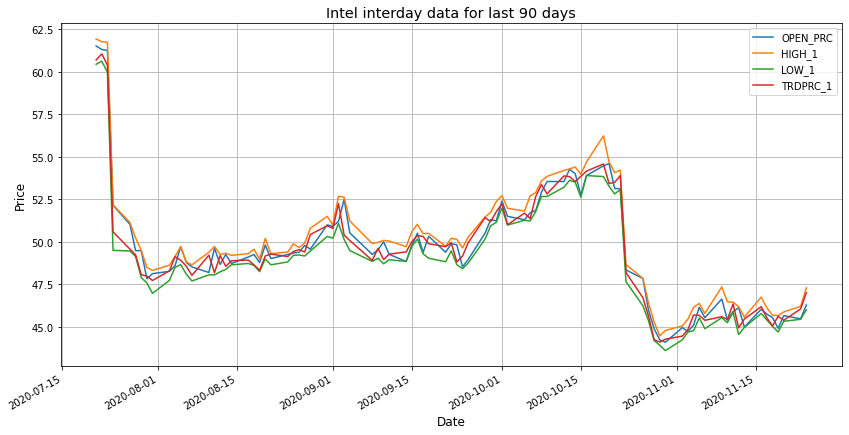

In [14]:
# Plotting a Graph for Intel

columns = ['OPEN_PRC','HIGH_1','LOW_1','TRDPRC_1']

intel_df_pricing.set_index('Date',drop=True,inplace=True)
intel_figure = plt.figure()

plt.xlabel('Date', fontsize='large')
plt.ylabel('Price', fontsize='large')


# Create graph title from Company and RIC names dynamically.
plt.ticklabel_format(style = 'plain')
plt.title('Intel interday data for last 90 days', color='black',fontsize='x-large')
ax = intel_figure.gca()

intel_df_pricing.plot(kind='line', ax = intel_figure.gca(),y=columns,figsize=(14,7) , grid = True)
plt.show()

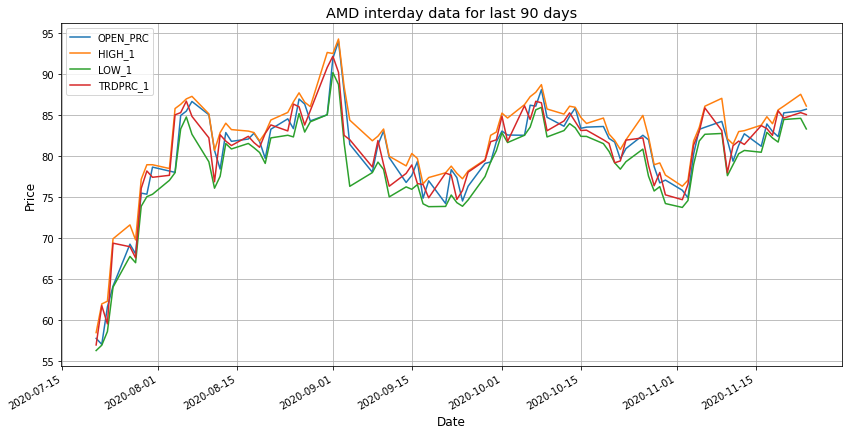

In [15]:
# Plotting a Graph for AMD

columns = ['OPEN_PRC','HIGH_1','LOW_1','TRDPRC_1']

amd_df_pricing.set_index('Date',drop=True,inplace=True)
amd_figure = plt.figure()

plt.xlabel('Date', fontsize='large')
plt.ylabel('Price', fontsize='large')


# Create graph title from Company and RIC names dynamically.
plt.ticklabel_format(style = 'plain')
plt.title('AMD interday data for last 90 days', color='black',fontsize='x-large')
ax = amd_figure.gca()

amd_df_pricing.plot(kind='line', ax = amd_figure.gca(),y=columns,figsize=(14,7), grid = True )
plt.show()

Now we got the charts and figure objects ready for the Pricing Sheet report. Next, we will create the Volume comparison chart for the Intel vs AMD Volume comparison Sheet.

### Intel vs AMD Volume Comparision

The next chart is block trading volume comparison  which is the *BLKVOLUM* data field. This chart contains Intel and AMD data in the same figure.

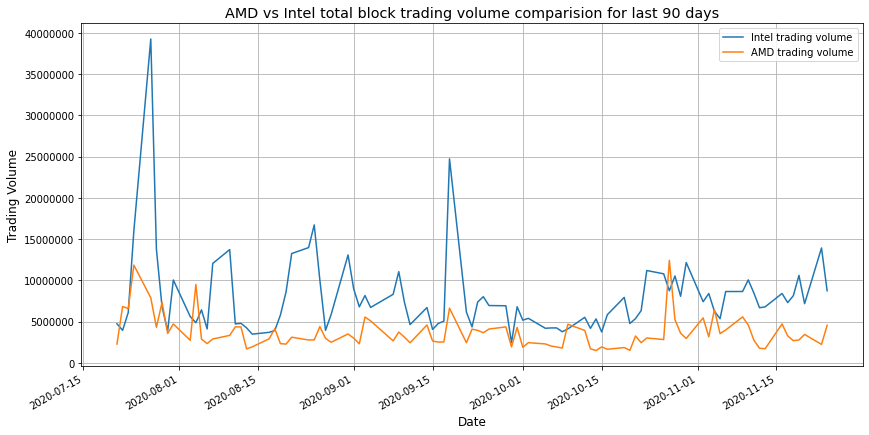

In [16]:
columns = ['BLKVOLUM']

# Intel
intel_amd_volume_figure = plt.figure()

plt.xlabel('Date', fontsize='large')
plt.ylabel('Trading Volume', fontsize='large')

# Create graph title from Company and RIC names dynamically.
plt.ticklabel_format(style = 'plain')
plt.title('AMD vs Intel total block trading volume comparision for last 90 days', color='black',fontsize='x-large')
ax = intel_amd_volume_figure.gca()

intel_df_pricing.plot(kind='line', ax = intel_amd_volume_figure.gca(),y=columns,figsize=(14,7) , label=['Intel trading volume'],grid = True)

# AMD
amd_df_pricing.plot(kind='line', ax = ax ,y=columns,figsize=(14,7), label=['AMD trading volume'],grid = True)

plt.show()

## Generate Report with xlwings PRO

Now all data (DataFrame and Charts) is ready. We have demonstrated the [Reports-API](https://docs.xlwings.org/en/stable/api.html#reports-api) and with Reports API ```create_report()``` function in the [part-1 notebook](./rdp_xlwingsce_notebook.ipynb) as the following example.

```
wb = create_report(
    'rdp_report_template.xlsx', 
    'rdp_report_pro.xlsx', 
    historical_title=historical_title, 
    df_historical=df_historical.head(10), 
    graph= fig
)
```

The above code is ok for small data. This part-2 notebook will show more features that developers can work with the ```create_report()``` function for supporting various requirements and template variables.

Firstly, let's define static texts and template/report file location.

In [17]:
# Define Static texts and template/report file location.
intel_price_title='Intel Hitorical Data'
amd_price_title = 'AMD Historical Data'

template_file = 'part2_rdp_report_template.xlsx' 
report_file = 'part2_rdp_intel_vs_amd.xlsx' 

Next, we create the Python [Dictionary](https://docs.python.org/3.7/tutorial/datastructures.html#dictionaries) object to collect all data for template variables. Please note that the Dictionary keys must have the same names as template variables.

#### xlwings versions 0.21.0 to 0.21.2
When using Excel tables, DataFrame indices are excluded by default. We would like to include them in the report, so we reset the index before providing the DataFrame to the ```create_report``` function with [df.reset_index()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html) function.

#### xlwings version 0.21.3
Since [xlwings version 0.21.3](https://docs.xlwings.org/en/stable/whatsnew.html#v0-21-3-nov-22-2020), the index is now transferred to Excel by default. If you would like to exclude the DataFrame index, you would need to use ```df.set_index('column_name')``` instead of ```df.reset_index()``` to hide the index.

This notebook application is based on xlwings version 0.21.3.

In [21]:
# Create a Dictionary to collect all report data
data = dict(
    intel_price_title=intel_price_title,
    intel_price_df = intel_df_pricing.head(15),
    intel_graph = intel_figure,
    amd_price_title = amd_price_title,
    amd_price_df = amd_df_pricing.head(15),
    amd_graph = amd_figure,
    intel_amd_volume_graph = intel_amd_volume_figure,
)

Then we call the create_report function.

In [22]:
wb = create_report(
    template_file, 
    report_file, 
    **data
)

The above ```create_report()``` function generates *part2_rdp_intel_vs_amd.xlsx* Excel report file with format/style defined in part2_rdp_report_template.xlsx and data that we pass to the function. With the default parameter, the part2_rdp_intel_vs_amd.xlsx file will be open automatically.


![Figure-5](images/xlwingspro/xlwings_pro_report_1.png "xlwings pro report Intel vs AMD Daily Price Sheet") 


![Figure-6](images/xlwingspro/xlwings_pro_report_2.png "xlwings pro report Intel vs AMD Volume Sheet") 

In [23]:
# close this Open Excel Report file
wb.close()

Developers can control the Excel instance by passing in an xlwings App instance. For example, to run the report in a separate and hidden instance of Excel. This is a useful feature if Developers aim to create an application that runs as a background service to generate reports daily, monthly, or weekly based on the business requirements.

In [24]:
app = xw.App(visible=False)

wb = create_report(
    template_file, 
    'part_2_daily_report.xlsx', 
    app = app,
    **data
)
app.quit()  # Close the wb and quit the Excel instance

Now the *part_2_montly_report.xlsx* Excel report file is created in the background.

## Close RDP Session

In [25]:
# -- Close Session, just calls close_session() function

rdp.close_session()

print(session.get_open_state())

State.Closed


## Embedded Code

The [xlwings Embedded Code](https://docs.xlwings.org/en/stable/deployment.html#embedded-code) is part of [xlwings PRO](https://www.xlwings.org/pro). It allows developers to store the Python code directly in Excel so developers don’t have to distribute separate Python files. This feature lets business users can consume RDP content with the macro-enabled Excel file (*xlsm* file) directly without any Python file required (the [Python](https://www.python.org/downloads/) or [Anaconda](https://www.anaconda.com/distribution/)/ [MiniConda](https://docs.conda.io/en/latest/miniconda.html) is still required).

Developers can implement the Python application to consume RDP data, then run xlwings ```xlwings code embed``` command in the console to import all Python files from the current directory and paste them into sheets with the same name of the currently active Excel workbook. 

The Python console application is more suitable to demonstrate this Embedded Code feature than via the Jupyter notebook. Please refer to the following RDP - IPA Bond examples file in *python_embedded* folder of this xlwings RDP project:
- rdp_ipa_bond.py: Python application source code.
- rdp_ipa_bond.xlsm: Excel file with embedded code from rdp_ipa_bond.py file.
- README.md: Embedded Code example readme file.

The Python Embedded example shows how to consume bond analytics data to the macro-enabled Excel file via RDP Libraries Financial Contracts API (```rdp.get_bond_analytics()``` function).

An example of an Excel file that has separated data and embedded Python Sheets is the following.

![Figure-7](images/xlwingspro/xlwings_pro_embeded_1.png "xlwings pro IPA data Sheet") 

![Figure-8](images/xlwingspro/xlwings_pro_embeded_2.png "xlwings pro IPA embedded Python Sheet") 

Once you have setup [xlwings Add-in: Run main](https://docs.xlwings.org/en/stable/addin.html#run-main) and [Embedded Code](https://docs.xlwings.org/en/stable/deployment.html#embedded-code) features; you can run the embedded Python Sheet in the xlwings ```Run Main``` toolbar to get and display IPA Data in Excel Sheet.

Alternatively, you can replace xlwings Add-in with a VBA module which lets you run embedded Python code from VBA function ```RunPython ("import mymodule;mymodule.myfunction()")``` without to install the add-in. Please see more detail in [xlwings add-in: quickstart command example](https://docs.xlwings.org/en/stable/vba.html#xlwings-add-in) page.

![Figure-9](images/xlwingspro/xlwings_pro_embeded_3.png "xlwings pro IPA result") 


## Exporting Excel report to PDF 

With newly release xlwings version *0.21.1* onward, the xlwings CE can export the whole Excel workbook or a subset of the sheets to a PDF file with xlwings ```Book.to_pdf()``` function. Please see more detail regarding the ```to_pdf``` function on [xlwings API reference page](https://docs.xlwings.org/en/stable/api.html#xlwings.Book.to_pdf).

We will demonstrate this feature with a quick Python source code from the [first notebook](./rdp_xlwingsce_notebook.ipynb) to create the Intel Daily Pricing report in PDF file format.

Firstly, create a new blank Excel report file and set a basic Report style.

In [26]:
wb = xw.Book() # Creating an new excel file. wb = xw.Book(filename) would open an existing file

intel_price_sheet = wb.sheets[0]
intel_price_sheet.name = 'Intel Pricing'
intel_price_sheet.range("A1").value = 'Intel Pricing'
intel_price_sheet.range("A1").api.Font.Size = 14 # Change font size
intel_price_sheet.range("A1").api.Font.ColorIndex = 2 # Change font color
intel_price_sheet.range('A1:H1').color = (0,0,255) # Change cell background color

# Set Pandas DataFrame object to newly created Excel File
intel_price_sheet.range("A2").value = intel_df_pricing.head(15)

# Set data table format

intel_price_sheet.range('2:1').api.Font.Bold = True #Make Column headers bold
intel_price_sheet.range('A2:H2').color = (144,238,144)  # Change cell background color
intel_price_sheet.autofit('c') # Set sheet autofit the width of column

Next, find the position of the last row of the report table as a position to plot a graph  (```intel_figure```).

In [27]:
# historical_sheet.cells.last_cell.row = row of the lower right cell

'''
change to your specified column, then go up until you hit a non-empty cell
'''
intel_price_last_row = intel_price_sheet.range((intel_price_sheet.cells.last_cell.row, 1)).end('up').row  

rng = intel_price_sheet.range('A{row}'.format(row = intel_price_last_row + 1))

# Resize inte_figure Figure object
intel_figure.set_figheight(6)
intel_figure.set_figwidth(6)

# Add figure to Excel report file as a picture
intel_price_sheet.pictures.add(intel_figure, name='MyPlot', update=True, top=rng.top, left=rng.left)

<Picture 'MyPlot' in <Sheet [Book2]Intel Pricing>>

### Save to PDF file

Then call the ```Book.to_pdf()``` function to save this Excel report as PDF file.

In [28]:
wb.to_pdf('./part_2_xlwings_to_pdf.pdf') # defaults to the same name as the workbook, in the same directory

The Excel report with RDP content will be saved as *part_2_xlwings_to_pdf.pdf* file.

![Figure-10](images/xlwingspro/xlwings_ce_pdf.png "xlwings CE to PDF feature") 


Finally, we close the Excel file without saving.

In [29]:
wb.close()

## Conclusion and Next Step

The xlwings CE library lets Python developers integrate data with Excel in a simple way. The xlwings PRO allows Python developers and business users to work together to integrate data with Excel or PDF report file in much easier than xlwings CE.

The xlwings Reports help businesses and financial teams design the report to match their business requirement freely. The Python developers/data engineers can focus on how to retrieve and optimize data without no need to worry about report design, look & feel. xlwings Reports also help developers can automate report generator process periodicity (such as a daily, weekly, or monthly report).

If users want dynamic data and charts in the report file, the xlwings Embedded Code feature lets users run Python code in the macro-enabled Excel report directly. Users do not need to run a separate Python code themselves or wait for Developers to generate a report file for them.

The newly introduced ```to_pdf``` feature also lets developers export the Excel Workbook/Sheets to the PDF file. This function helps business users who do not have [Microsoft Office](https://www.office.com/) installed can still be able to open the PDF report file.


At the same time, the [Refinitiv Data Platform (RDP) Libraries](https://developers.refinitiv.com/refinitiv-data-platform/refinitiv-data-platform-libraries) let developers rapidly access Refinitiv Platform content with a few lines of code that easy to understand and maintain. Developers can focus on implement the business logic or analysis data without worry about the connection, authentication detail with the Refinitiv Platforms.

The integration between Refinitiv APIs and xlwings is not limited to only RDP Libraries. Any [Refinitiv APIs](https://developers.refinitiv.com/en/api-catalog?i=1;q1=page-type%3Aapi;q2=devportal%3Alanguages~2Fpython;sort=title;sp_c=12;sp_cs=UTF-8;sp_k=devportal-prod;view=xml;x1=w-page-type-id;x2=api-language) that support Python programming language such as [Eikon Data API](https://developers.refinitiv.com/en/api-catalog/eikon/eikon-data-api) ([Eikon Data API-xlwings article](https://developers.refinitiv.com/en/article-catalog/article/financial-reporting-with-eikon-and-excel)), or [RKD API](https://developers.refinitiv.com/en/api-catalog/refinitiv-knowledge-direct/refinitiv-knowledge-direct-api-rkd-api), or [DataStream Web Service - Python](https://developers.refinitiv.com/en/api-catalog/eikon/datastream-web-service/) can work with xlwings library using the same concept and code logic as this RDP Libraries notebook examples.

## References

You can find more details regarding the Refinitiv Data Platform Libraries, xlwings, and related technologies for this notebook from the following resources:
* [Refinitiv Data Platform (RDP) Libraries](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-platform-libraries) on the [Refinitiv Developer Community](https://developers.refinitiv.com/) web site.
* [xlwings web site](https://www.xlwings.org/).
* [xlwings PRO page](https://www.xlwings.org/pro).
* [xlwings PRO Document page](https://docs.xlwings.org/en/stable/pro.html).
* [xlwings API Reference page](https://docs.xlwings.org/en/stable/api.html).
* [xlwings Reports page](https://www.xlwings.org/reporting).
* [xlwings Embedded Code page](https://docs.xlwings.org/en/stable/deployment.html#embedded-code).
* [RDP Libraries Quick Start Guide page](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-platform-libraries/quick-start).
* [RDP Libraries Tutorial page](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-platform-libraries/tutorials).
* [Discover our Refinitiv Data Platform Library (part 1)](https://developers.refinitiv.com/en/article-catalog/article/discover-our-refinitiv-data-platform-library-part-1).
* [Discover our Refinitiv Data Platform Library (part 2)](https://developers.refinitiv.com/en/article-catalog/article/discover-our-refinitiv-data-platform-library-part-2).
* [How to integrate Financial Data from Refinitiv Data Platform to Excel with Xlwings - Part 1](https://developers.refinitiv.com/en/article-catalog/article/how-to-integrate-financial-data-from-refinitiv-data-platform-to-).
* [Financial Reporting with Eikon, xlwings and Excel](https://developers.refinitiv.com/en/article-catalog/article/financial-reporting-with-eikon-and-excel).

For any questions related to this article or Refinitiv Data Platform Libraries, please use the Developers Community [Q&A Forum](https://community.developers.refinitiv.com/spaces/321/refinitiv-data-platform-libraries.html).